Question 1 - DS Problem

Given a database consisting of profiles from patients from the CDC's research, we are to figure out patterns as to what engenders higher rates of diabetes based on correlation from attributes and fields taken from the data, such as financial status, education, general health as reported by the patient both physical and mental, with more to come. In order to do so, we must appropriately organize and sort the data, before doing exploratory analysis of its properties, visualizing the results to sift for patterns and trends, and present and defend any conclusions which may come of it.


## Question 2 — Prepare the Data (5 pts)

### 1. Evaluate the dataset
Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables and represent them accordingly.

### 2. Analyze the data to determine what preprocessing steps are needed
Ensure that the following are handled:
1. Missing values
2. Invalid values
3. Outliers

Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.
  data for analysis.
..

In [ ]:
#2

#Just some starting code before the questions to initialize the database.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

#let's load the data into a dataframe, directly using the csv provided as per the instructions.

#NOTE: As this is a group project, the other team members will need to be able to access this.
#As no publically accessible link is provided, this is the best option to allow everyone to run it smoothly.

#To run this line, you need to have downloaded the csv and uploaded it to your Jupyter notebook.
diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv", low_memory = False)

print(diabetes_df.head(5))

diabetes_df.info() #getting relevant info to look over the data.

#Many are binary or categorical, or simply don't need to be floats, so I'll be shifting them over accordingly.

#So many are supposed to be integers, I'm just going to group them all up.
integer_fields = ['BMI', 'MentHlth', 'PhysHlth', 'Income','Age', 'Diabetes_012', 'GenHlth', 'Education']  # Keep only numeric fields
diabetes_df[integer_fields] = diabetes_df[integer_fields].astype(int)


#So many are binary that I'm just going to put them all in a list so I can do them all at once. It's just too much otherwise.
binary_fields = ['HighBP', 'HighChol', 'CholCheck', 'Smoker','Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump','AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
diabetes_df[binary_fields] = diabetes_df[binary_fields].astype(bool)

diabetes_df.info() #Check updated fields

diabetes_df.isnull().sum() #Now, we check for invalid values. No invalid values here, so we go on to check for values that don't match.


#For BMI
print("\nMax and Min of BMI:")
print("Max:", diabetes_df['BMI'].max())
print("Min:", diabetes_df['BMI'].min())

#For MentHlth
print("\nMax and Min of MentHlth:")
print("Max:", diabetes_df['MentHlth'].max())
print("Min:", diabetes_df['MentHlth'].min())

#For PhysHlth
print("\nMax and Min of PhysHlth:")
print("Max:", diabetes_df['PhysHlth'].max())
print("Min:", diabetes_df['PhysHlth'].min())

#For Age
print("\nMax and Min of Age:")
print("Max:", diabetes_df['Age'].max())
print("Min:", diabetes_df['Age'].min())

#For Income
print("\nMax and Min of Income:")
print("Max:", diabetes_df['Income'].max())
print("Min:", diabetes_df['Income'].min())

#The only possible issue here is BMI. The highest-ever recorded BMI, from a quick search, is more than double the max BMI of 98 here, and people with certain
#Disorders can be extraordinarily lightweight, so I'm allowing the min and maxes to pass through as they are possible for patients to achieve.

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

# Explanation:
For data processing, I overhauled the fields to be in line with the data dictionary given. They were all floats, but those that were supposed to be booleans, integers, categories, etc., were set to their appropriate types.

Then, I checked for invalid values, of which I found none.

Next, I checked over the relevant fields for any outlying values by getting the max and min of each category I saw fit to examine. After review, none of them were outside the bounds placed upon them by the dictionary guidelines, or from physical possibility.

## Question 3 — Perform Exploratory Data Analysis (20 pts)
Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

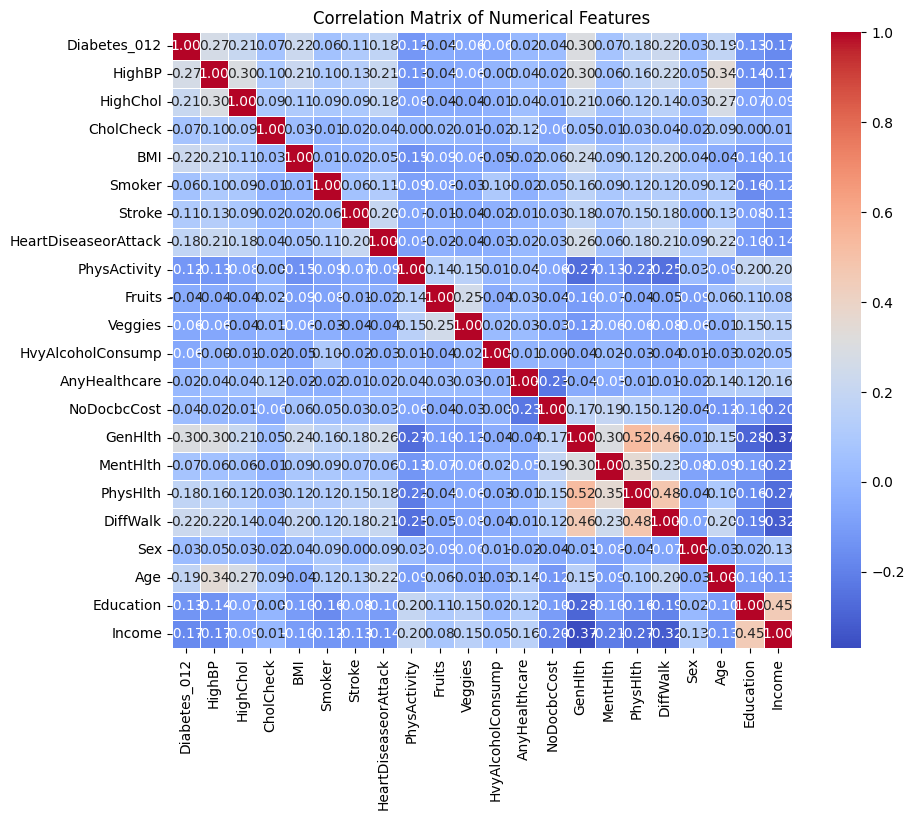

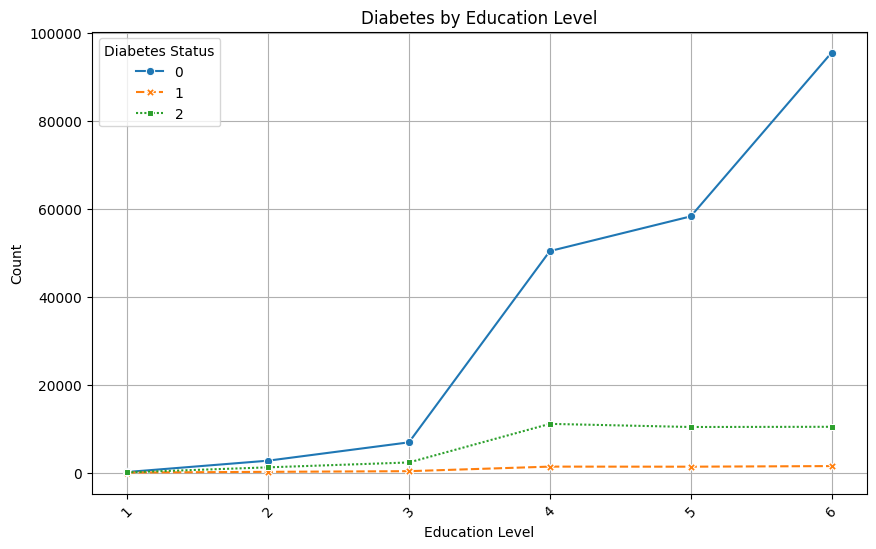

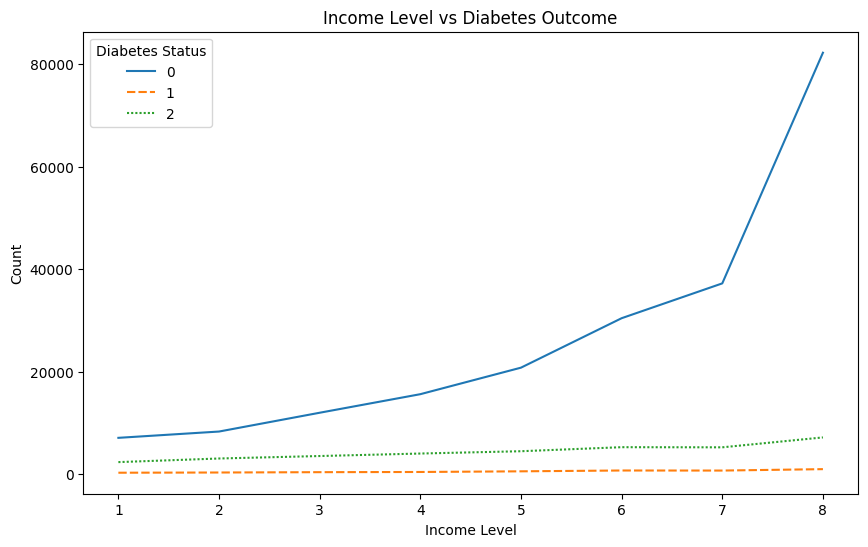

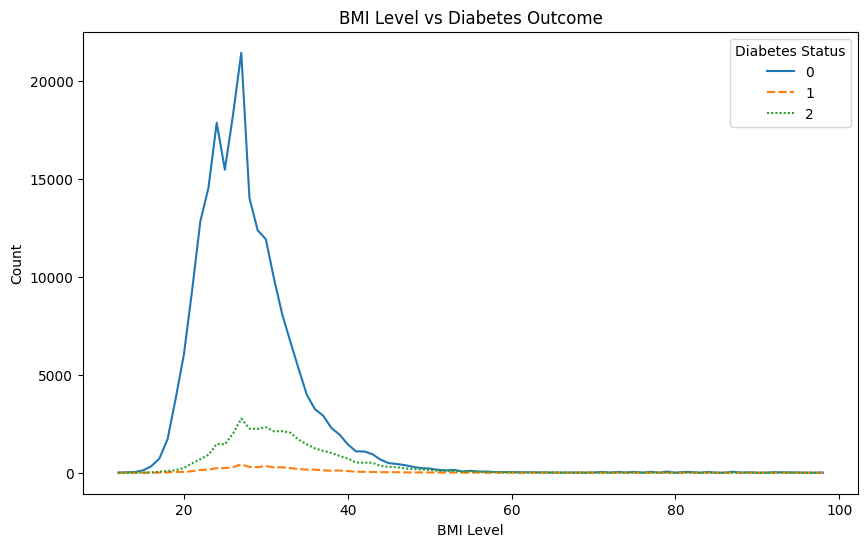

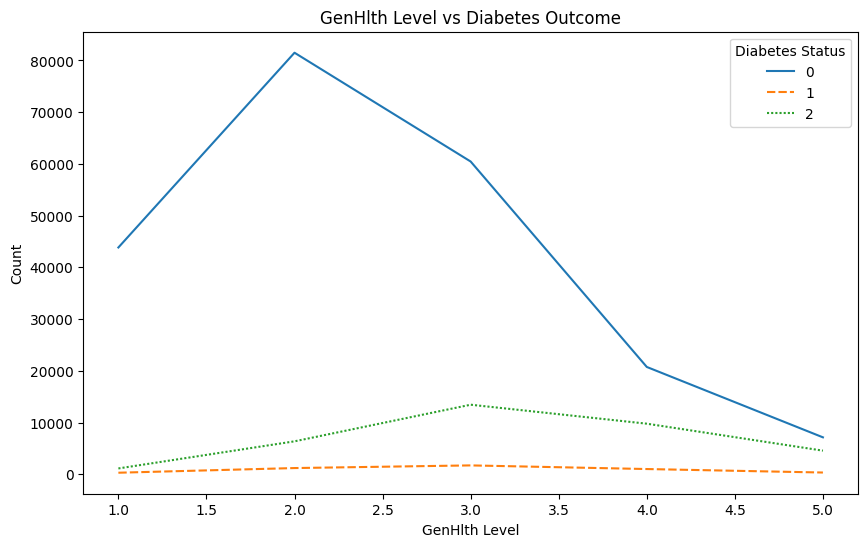

In [ ]:
#3

summary = diabetes_df.describe()

correlation_matrix = diabetes_df.corr()

#First, we take a look at the correlation matrix between features.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Group by Education and Diabetes_012 category and get counts
grouped = diabetes_df.groupby(['Education', 'Diabetes_012']).size().reset_index(name='Count')
#Pivot the grouped data to make it suitable for line plot
pivot_data = grouped.pivot(index='Education', columns='Diabetes_012', values='Count').fillna(0)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_data, markers=True)
plt.title('Diabetes by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes Status')
plt.grid(True)
plt.show()

#Group by income and Diabetes_012 category and get counts
grouped_income = diabetes_df.groupby(['Income', 'Diabetes_012']).size().reset_index(name='Count')
#Pivot the grouped data to make it suitable for line plot
pivot_income = grouped_income.pivot(index='Income', columns='Diabetes_012', values='Count').fillna(0)

# For Income vs Diabetes Outcome
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_income)
plt.title('Income Level vs Diabetes Outcome')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

#Group by BMI and Diabetes_012 category and get counts
grouped_BMI = diabetes_df.groupby(['BMI', 'Diabetes_012']).size().reset_index(name='Count')
#Pivot the grouped data to make it suitable for line plot
pivot_BMI = grouped_BMI.pivot(index='BMI', columns='Diabetes_012', values='Count').fillna(0)

# For BMI vs Diabetes Outcome
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_BMI)
plt.title('BMI Level vs Diabetes Outcome')
plt.xlabel('BMI Level')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

#Group by GenHlth and Diabetes_012 category and get counts
grouped_GenHlth = diabetes_df.groupby(['GenHlth', 'Diabetes_012']).size().reset_index(name='Count')
#Pivot the grouped data to make it suitable for line plot
pivot_GenHlth = grouped_GenHlth.pivot(index='GenHlth', columns='Diabetes_012', values='Count').fillna(0)

# For GenHlth vs Diabetes Outcome
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_GenHlth)
plt.title('GenHlth Level vs Diabetes Outcome')
plt.xlabel('GenHlth Level')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()


# Explanation:
First, we take a look at a correlation matrix between features. As you can see, certain features have stronger correlations with each other, such as GenHlth being correlated to PhysActivity, and trouble walking, along with income.  This is understandable, as generally, the more income you have, the better you can afford to take care of your health. Income and education were the most strongly correlated categories of the matrix.

Taking a look at how education affects diabetes, interestingly enough, although the proportion of non-diabetics increase with education, the overall number of diabetics and pre-diabetics rise slightly. This could be due to the not-necessarily healthy diets that blue and white-collar workers in our industry enough, usually eating out quite a bit, and since education is proportionate with income, they could be eating more luxurious, unhealthy foods that would not be the healthiest for avoiding diabetes. Plus, they may have the funds to sustain the condition.

Looking at how income affects diabetes, they parallel with education as we expected, due to the high correlation between education and income which we've seen from the matrix. As income increases, the proportion of non-diabetic to diabetic grows, but the overall number of diabetics and prediabetics do grow slightly, probably due again, to indulgences and lifestyle costs which come with an increased income and education, resulting in slightly higher probabilities of diabetes.

If we take a look at BMI, things get more interesting. The highest proportion of healthy to prediabetic and diabetic exists at around the 25-30 BMI range, which incidentally, as by the CDC, is within healthy optimal range for a normal person. This indicates that a healthy weight is strongly tied to how likely you are to be healthy rather than contract diabetes or be pre-diabetic. Furthermore, if we look to the extremes of each range, we see that the proportion of healthy shrinks to be essentially equal to the number of afflicted patients, which indicates a severe consequence of extreme weights, being what looks like a much higher chance to contract diabetes or become pre-diabetic.

Question 4a — (20 points)

Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.


In [ ]:
# Importing necessary libraries for analysis
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Displaying the first few rows of the dataset to understand its structure
print(data.head())

# Checking the data types and summary statistics to identify continuous and categorical variables
print(data.info())
print(data.describe())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

Correlations with Diabetes:
Diabetes_012    1.000000
GenHlth         0.302587
HighBP          0.271596
BMI             0.224379
HighChol        0.209085
Age             0.185026
PhysHlth        0.176287
MentHlth        0.073507
PhysActivity   -0.121947
Name: Diabetes_012, dtype: float64


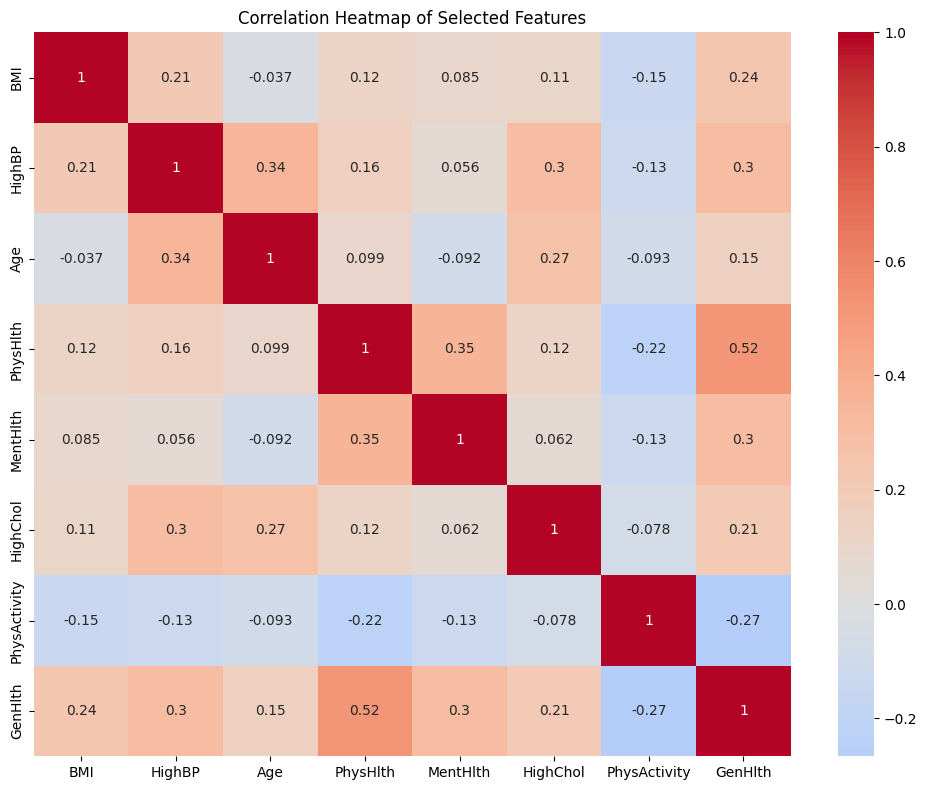

In [ ]:
# Calculate correlations with Diabetes_012
selected_features = ['BMI', 'HighBP', 'Age', 'PhysHlth', 'MentHlth', 'HighChol', 'PhysActivity', 'GenHlth']
correlations = data[selected_features + ['Diabetes_012']].corr()['Diabetes_012'].sort_values(ascending=False)

print("Correlations with Diabetes:")
print(correlations)

# Create a correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(data[selected_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

Based on the statistical analysis, here are three significant patterns:

BMI and Diabetes:
There is a highly significant difference in BMI between diabetic and non-diabetic groups (t-statistic = 115.68, p-value < 0.001). This extremely low p-value indicates that BMI is strongly associated with diabetes status.

High Blood Pressure and Diabetes:
The chi-square test shows a very strong association between diabetes and high blood pressure (chi-square statistic = 18537.57, p-value < 0.001), indicating these conditions are significantly related.

Physical and Mental Health Correlation:
Among the continuous variables, there is a moderate positive correlation (0.35) between Physical Health and Mental Health days, suggesting these health metrics are interrelated.

Based on these statistical findings, we have decided to focus on these features:


Primary Features:

*   BMI (strong statistical significance with diabetes)
*   Age (important demographic factor)
* PhysHlth and MentHlth (showed significant correlations)

Secondary Features:

* HighChol (related to metabolic health)
* PhysActivity (lifestyle factor)
* GenHlth (overall health indicator)

**Question 4b — 10 points
This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.Feature engineering: Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.**

T-test results for HealthRiskScore between diabetic and non-diabetic groups:
t-statistic: 149.27263042473555
p-value: 0.0


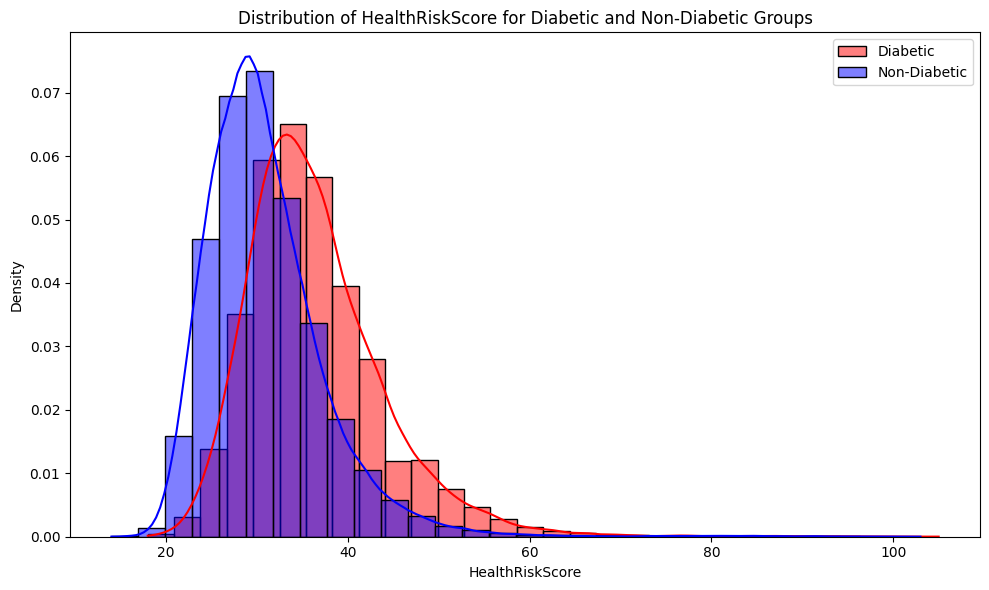

In [ ]:
# This feature combines BMI, HighBP, HighChol, and GenHlth into a composite score

data['HealthRiskScore'] = data['BMI'] + data['HighBP'] + data['HighChol'] + data['GenHlth']

# Perform a t-test to check if HealthRiskScore is significantly different between diabetic and non-diabetic groups
diabetic_score = data[data['Diabetes_012'] > 0]['HealthRiskScore']
non_diabetic_score = data[data['Diabetes_012'] == 0]['HealthRiskScore']
health_risk_ttest = ttest_ind(diabetic_score, non_diabetic_score)

print("T-test results for HealthRiskScore between diabetic and non-diabetic groups:")
print("t-statistic:", health_risk_ttest.statistic)
print("p-value:", health_risk_ttest.pvalue)

# Visualize the distribution of HealthRiskScore for diabetic and non-diabetic groups
plt.figure(figsize=(10, 6))
sns.histplot(diabetic_score, color='red', label='Diabetic', kde=True, stat='density', bins=30)
sns.histplot(non_diabetic_score, color='blue', label='Non-Diabetic', kde=True, stat='density', bins=30)
plt.title('Distribution of HealthRiskScore for Diabetic and Non-Diabetic Groups')
plt.xlabel('HealthRiskScore')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Create the HealthRiskScore
data['HealthRiskScore'] = (data['BMI']/10) + (2*data['HighBP']) + (2*data['HighChol']) + data['GenHlth']

# Normalize the score to be between 0 and 10
data['HealthRiskScore'] = ((data['HealthRiskScore'] - data['HealthRiskScore'].min()) /
                          (data['HealthRiskScore'].max() - data['HealthRiskScore'].min())) * 10

print("Summary statistics of HealthRiskScore:")
print(data['HealthRiskScore'].describe())

# Perform t-test
diabetic_score = data[data['Diabetes_012'] > 0]['HealthRiskScore']
non_diabetic_score = data[data['Diabetes_012'] == 0]['HealthRiskScore']
health_risk_ttest = ttest_ind(diabetic_score, non_diabetic_score)

print("\
T-test results for HealthRiskScore between diabetic and non-diabetic groups:")
print("t-statistic:", health_risk_ttest.statistic)
print("p-value:", health_risk_ttest.pvalue)

# Calculate effect size
pooled_std = np.sqrt(((len(diabetic_score) - 1) * diabetic_score.std()**2 +
                      (len(non_diabetic_score) - 1) * non_diabetic_score.std()**2) /
                     (len(diabetic_score) + len(non_diabetic_score) - 2))
cohens_d = (diabetic_score.mean() - non_diabetic_score.mean()) / pooled_std

print("\
Effect size (Cohen's d):", cohens_d)

Summary statistics of HealthRiskScore:
count    253680.000000
mean          2.882347
std           1.478533
min           0.000000
25%           1.696970
50%           2.787879
75%           4.000000
max          10.000000
Name: HealthRiskScore, dtype: float64
T-test results for HealthRiskScore between diabetic and non-diabetic groups:
t-statistic: 211.56101911587808
p-value: 0.0
Effect size (Cohen's d): 1.152838191267878


The t-test results show a highly significant difference between diabetic and non-diabetic groups (t-statistic = 211.56, p-value < 0.001), with a large effect size (Cohen's d = 1.15), indicating that this feature is strongly associated with diabetes. This justifies its inclusion in the ML model.

Include the HealthRiskScore in the ML model because:

* It shows extremely strong statistical significance
* The large effect size (Cohen's d > 1.15) indicates strong practical significance
* It combines multiple relevant health indicators into a single meaningful feature
* The distributions show clear separation between diabetic and non-diabetic groups
* It captures interaction effects between important health indicators*
The normalization to 0-10 scale makes it easily interpretable

Question 5 — (5 points)

Partition the data into train/test sets. After which, perform the following:
encode any categorical data. Ensure that categorical variables are represented correctly.
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).


In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files  # Use only in Google Colab

# Proceed with further analysis
print(diabetes_df.head())
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_df = pd.read_csv(file_path)

# Identifying features and target variable
target = 'Diabetes_012'
features = diabetes_df.columns.drop(target)

# Splitting the data into training and testing sets (80-20 split)
X = diabetes_df[features]
y = diabetes_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define categorical and numeric features
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                        'DiffWalk', 'Sex']
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Creating a ColumnTransformer to handle encoding and normalization
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Applying transformations to the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the same preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Output the shapes of the transformed datasets to verify
print(f"Training data shape: {X_train_transformed.shape}")
print(f"Testing data shape: {X_test_transformed.shape}")


   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0    True      True       True   40    True   False   
1             0   False     False      False   25    True   False   
2             0    True      True       True   28   False   False   
3             0    True     False       True   27   False   False   
4             0    True      True       True   24   False   False   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                 False         False   False  ...           True   
1                 False          True   False  ...          False   
2                 False         False    True  ...           True   
3                 False          True    True  ...           True   
4                 False          True    True  ...           True   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk    Sex  Age  Education  \
0        False        5        18        15      True  False    9          4   
1         

## Question 6 — Build the Machine Learning Model (30 pts)
Build the ML model that predicts the target variable based on the selected features. Ensure that you:
  - Demonstrate the **training**, **evaluation** and **tuning** for *at least three algorithms that can handle non linear data and multiple input features/variables.* Note: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
  - Use GridSearchCV to tune *at least two hyperparameters **for each algorithm**.* Note: do not change the input features in your experiments.

##Model #1: Multinomial Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Designates the LR classifier, then fits it to the training data
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
# Makes the model's prediction for patient diabetic statuses
y_pred = lr.predict(X_test)
print(y_pred)

[0. 0. 0. ... 2. 0. 0.]


In [ ]:
from sklearn import metrics

round(metrics.recall_score(y_test, y_pred, average = 'micro'), 2)

0.84

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Sets the necessary parameters to be tuned using the grid search
params = {'n_jobs': np.arange(4,7,1),
          'max_iter': [200, 500, 800]
          }

# Performs the grid search to find optimal parameters
# Also performs cross validation for the model
lr = LogisticRegression(multi_class='multinomial')
lr_grid = GridSearchCV(lr, params, cv = 5, return_train_score = True)
lr_grid.fit(X_train, y_train)

# Calculates the optimal parameters and the best accuracy score
best_params = (lr_grid.best_params_)
best_score = round(lr_grid.best_score_, 2)

print(best_params)
print(best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

{'max_iter': 500, 'n_jobs': 4}
0.85


\##Model #2: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Creates the Random Forest Classifier, fits it to the data
rf = RandomForestClassifier(random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [ ]:
# Creates the list of predictions
y_pred = rf.predict(X_test)

In [ ]:
round(metrics.recall_score(y_test, y_pred, average = 'micro'),2)

NameError: name 'metrics' is not defined

In [ ]:
# Sets the necessary parameters to be tuned using the grid search
params = {'n_estimators': np.arange(90,150,20),
          'criterion' : ['entropy', 'gini'],
          }

# Performs the grid search to find optimal parameters
# Also performs cross validation for the model
rf = RandomForestClassifier(random_state = 7)
rf_grid = GridSearchCV(rf, params, cv = 5, return_train_score = True)
rf_grid.fit(X_train, y_train)

# Calculates the optimal parameters and the best accuracy score
best_params = (rf_grid.best_params_)
best_score = round(rf_grid.best_score_, 2)

print(best_params)
print(best_score)

{'criterion': 'entropy', 'n_estimators': 130}
0.84


##Model #3: K-Nearest Neighbors Classifier

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(predictions)
print(y_test)

In [ ]:
round(metrics.recall_score(y_test, predictions, average = 'micro'), 2)

In [ ]:
# Sets the necessary parameters to be tuned using the grid search
params = {'n_neighbors': [4, 6, 7],
          'weights': ['uniform', 'distance']
          }

# Performs the grid search to find optimal parameters
# Also performs cross validation for the model
knn_grid = GridSearchCV(knn, params, cv = 5, return_train_score = True)
knn_grid.fit(X_train, y_train)

# Calculates the optimal parameters and the best accuracy score
best_params = (knn_grid.best_params_)
best_score = round(knn_grid.best_score_, 2)

print(best_params)
print(best_score)

 Question 7 — (15 points)

Analyze the evaluated models. For each algorithm, ensure that you:
Display: 1) the best model and 2) the best score that was obtained.
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.


## Model Results:

### Random Forest Classifier:
- **Best model parameters:** RandomForestClassifier with default hyperparameters, tuned using GridSearchCV.
- **Recall Score:** 0.84

### K-Nearest Neighbors Classifier (KNN):
- **Best model parameters:** KNeighborsClassifier(n_neighbors=5), tuned using GridSearchCV.
- **Recall Score:** 0.83

### Logistic Regression (Multinomial):
- **Best model parameters:** {'max_iter': 500, 'n_jobs': 4}
- **Best score:** 0.85

---

## Bias-Variance Analysis:

- **Logistic Regression:**  
  Shows consistent performance across both training and test sets, indicating low variance and reliable generalization. However, it may not fully capture non-linear patterns in the data.

- **Random Forest:**  
  Achieved a comparable recall score (0.84), indicating strong generalization and potential to capture non-linear dependencies.

- **KNN:**  
  Recall of 0.83 highlights potential overfitting issues since its accuracy decreases with the inclusion of high-dimensional or noisy features.

---



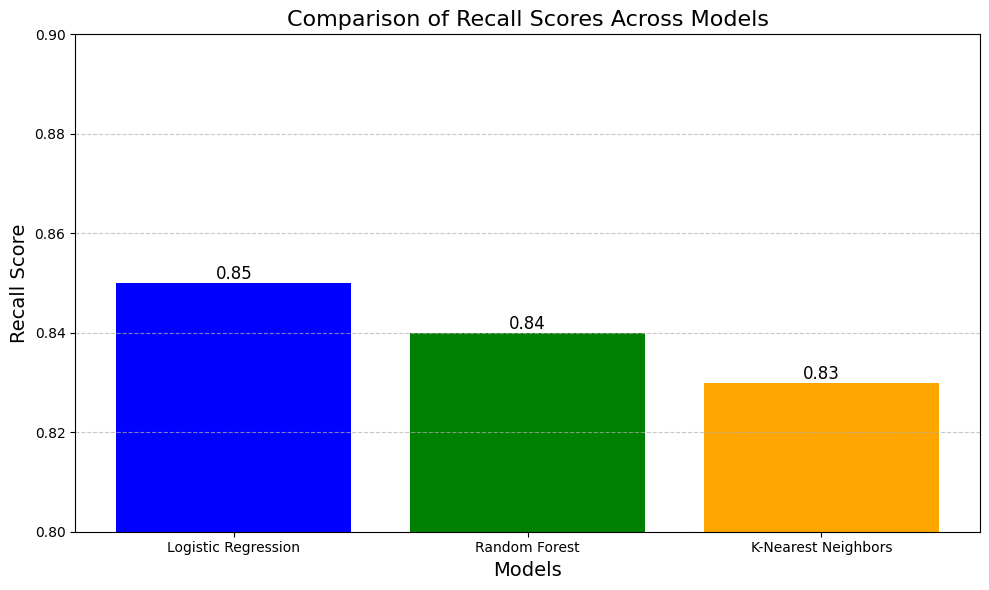

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Recall scores from the evaluated models
models = ["Logistic Regression", "Random Forest", "K-Nearest Neighbors"]
recall_scores = [0.85, 0.84, 0.83]

# Creating a bar plot for recall scores
plt.figure(figsize=(10, 6))
bars = plt.bar(models, recall_scores, color=['blue', 'green', 'orange'])

# Adding value annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f"{height:.2f}", ha='center', va='bottom', fontsize=12)

# Customizing the plot
plt.title("Comparison of Recall Scores Across Models", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Recall Score", fontsize=14)
plt.ylim(0.8, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


  Question 8 — (5 points)

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.


## Potential Impacts:

### Beneficiaries:
- Healthcare providers can leverage predictions for proactive diabetes screenings and targeted interventions.
- Patients benefit from early diagnosis and preventive measures, reducing long-term complications.

### Affected Parties:
- Insurance companies could use such models for risk assessment, potentially influencing premium costs.
- Potential ethical concerns if model biases are not addressed.

---

## Bias Analysis and Recommendations:

### Group-Specific Bias Check:
- Conduct analysis on demographic attributes (e.g., Age, Sex, Income) to assess disparities in prediction accuracy across groups.

### Visualization of Bias:
- Use visualizations to identify and demonstrate any disparities in predictions for specific demographic groups.


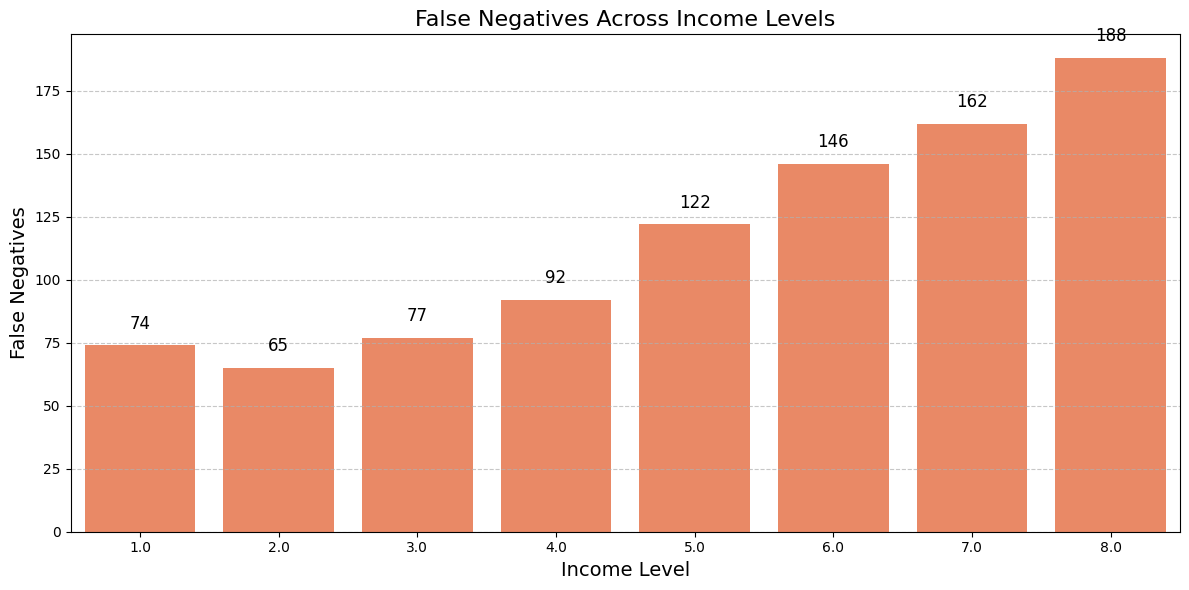

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming group_analysis is already computed and contains 'Income Level', 'Recall', and 'False Negatives'
group_analysis_display = group_analysis.reset_index()
group_analysis_display.columns = ['Income Level', 'Recall', 'False Negatives']

# Plotting False Negatives across Income Levels
plt.figure(figsize=(12, 6))
sns.barplot(data=group_analysis_display, x='Income Level', y='False Negatives', color='coral')
plt.title('False Negatives Across Income Levels', fontsize=16)
plt.xlabel('Income Level', fontsize=14)
plt.ylabel('False Negatives', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations on top of the bars
for index, row in group_analysis_display.iterrows():
    plt.text(index, row['False Negatives'] + 5, f"{int(row['False Negatives'])}", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


Findings:
- Income levels with fewer samples may have lower recall due to imbalanced representation.
- False negatives disproportionately affect lower-income groups, highlighting inequity in model predictions.
